<a href="https://colab.research.google.com/github/nrdnandan/Dimensionality-Reduction-models/blob/main/Autoencoder_keras_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import tensorflow as tf
import keras
import numpy as np
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
%matplotlib inline

**Load data and normalize data between 0 and 1 and reshape it**

In [144]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()   #Load data from keras library

In [145]:
x_train = x_train.astype('float32')/255.  #Since pixel value ranges upto 255 we normalize by dividing by 255
x_test = x_test.astype('float32')/255.

In [146]:
x_train = np.reshape(x_train,(len(x_train),28,28,1))   #For Convolutional Autoencoder we require image channel also so we add '1' for the last dimension
x_test = np.reshape(x_test,(len(x_test),28,28,1))

**6 Layer Deep Convolutional Autoencoder Model**

In [165]:
input_dim = keras.Input(shape=(28,28,1))   #Input image dimension to be fed into the conv2d network
#Encoder Network
enc = layers.Conv2D(256,(3,3),activation='relu',padding='same')(input_dim) #Used higher dimension to capture higher feature of the data.
enc = layers.MaxPool2D((2,2),padding='same')(enc)
enc = layers.Conv2D(128,(3,3),activation='relu',padding='same')(enc)
enc = layers.MaxPool2D((2,2),padding='same')(enc)
enc = layers.Conv2D(128,(3,3),activation='relu',padding='same')(enc)
enc_final = layers.MaxPool2D((2,2),padding='same')(enc)
## Encoded output is of shape (4,4,128)

#Decoder Network
dec = layers.Conv2D(128,(3,3),activation='relu',padding='same')(enc_final)
dec = layers.UpSampling2D((2,2))(dec) #Does the exact opposite of Pooling
dec = layers.Conv2D(128,(3,3),activation='relu',padding='same')(dec)
dec = layers.UpSampling2D((2,2))(dec)
dec = layers.Conv2D(256,(3,3),activation='relu')(dec) #Padding is removed since we require input and output to have same dimension
dec = layers.UpSampling2D((2,2))(dec)
dec_final = layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(dec) #Sigmoid for recognizing single class instead of softmax

out = keras.Model(input_dim,dec_final) #Decoded final output
compress = keras.Model(input_dim,enc_final) #Encoded(compressed) embedding output


**Model training and evaluation**

In [166]:
out.compile(optimizer='adam',loss='binary_crossentropy') 

In [167]:
out.fit(x_train,x_train,epochs=30,batch_size=64,validation_data=(x_test,x_test),shuffle=True)

Epoch 1/30
938/938 [==============================] - 40s 43ms/step - loss: 0.0977 - val_loss: 0.0752
Epoch 2/30
938/938 [==============================] - 40s 43ms/step - loss: 0.0734 - val_loss: 0.0706
Epoch 3/30
938/938 [==============================] - 40s 42ms/step - loss: 0.0704 - val_loss: 0.0694
Epoch 4/30
938/938 [==============================] - 40s 43ms/step - loss: 0.0689 - val_loss: 0.0682
Epoch 5/30
938/938 [==============================] - 40s 42ms/step - loss: 0.0679 - val_loss: 0.0668
Epoch 6/30
938/938 [==============================] - 40s 43ms/step - loss: 0.0672 - val_loss: 0.0671
Epoch 7/30
938/938 [==============================] - 40s 43ms/step - loss: 0.0666 - val_loss: 0.0666
Epoch 8/30
938/938 [==============================] - 40s 42ms/step - loss: 0.0661 - val_loss: 0.0654
Epoch 9/30
938/938 [==============================] - 40s 42ms/step - loss: 0.0657 - val_loss: 0.0654
Epoch 10/30
938/938 [==============================] - 40s 42ms/step - loss: 0.065

**T-Stochastic Neighbouring Embedding**

In [188]:
tsne = TSNE(n_components=2,random_state=0,n_jobs=-1)

In [179]:
compress.predict(x_test).shape #Get the shape of the encoded output

(10000, 4, 4, 128)

In [189]:
tsne_obj = tsne.fit_transform(compress.predict(x_test).reshape(10000,2048)) #Train the t-sne model on the encoded output

In [191]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'digit':y_test})
tsne_df.head()

#Form a dataframe for the 2-D t-sne for first 10 digits(0-9)

,X,Y,digit
0,-36.170681,-14.102036,7
1,-23.155642,23.465330,2
2,-63.832348,12.236168,1
3,44.581364,23.538847,0
4,-0.693081,-72.078987,4


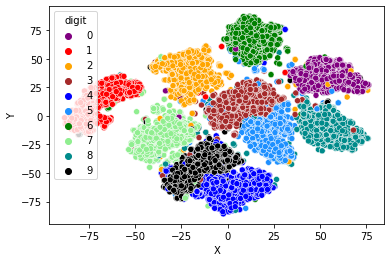

In [192]:
sns.scatterplot(x="X", y="Y",
              hue="digit",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=tsne_df);

#Plot the t-sne plot for encoded output              

In [ ]:
#EOF